# **ROC-AUC LAB**

ROC stands for 'Receiver Operator Characerstic' which is an important metric to evaluate the performance of a classification model. 
Before jumping right into the specifics of ROC there are few concepts that needs to be addressed.

1- TPR - True positive Rate

2- TNR - True neagtive Rate

3- FPR - False Positive Rate

4- FNR - False Neagtive Rate

**1- TPR - True Positive Rate**

As the name suggests TPR is a simple measure of how well the classification model has classified a positive class as positive. Its also known as 'Sensitivity' defined as:

***`TPR/Sensitivity = (No.TruePositives) / (No.TruePositive + No.FalseNegatives)`***

**2- TNR - True Negative Rate**

It determines what proportion of negative class got correctly identified by the model. It is also known as 'Specificity' defined mathematically as:

***`TNR/Specificity = (No.TrueNegatives) / (No.TrueNegatives + No.FalsePositives)`***

**3- FPR - False Positive Rate**
It tells us what proportion of positive class got correctly identified by the model. It is mathematically defined as:

***`FPR = (No.FalsePositives) / (No.TrueNegatives + No.FalsePositives)`***

OR

***`FPR = 1-specificity`***

**4- FNR - False Positive Rate**
It tells us what proportion of negative class got correctly identified by the model. It is mathematically defined as:

***`FNR = (No.FalseNegatives) / (No.TruePositives + No.FalseNegatives)`***

**ROC-AUC**

The most important measure from above are `TPR` and `FPR`. An ROC curve is drawn with `FPR` on the x-axis and `TPR` on the y-axis.

In a classification problem the predicted probabilities for classes are useful. Because that way you can set a threshold as per your problem.
For example, imagine a classifcation model that has predicted following array of probabilites:

`pred = [0.20, 0.68, 0.48, 0.79, 0.91, 0.54, 0.12]`

If threshold is set to be 0.5 then all the prob less then 0.5 would be classified as '0' and greater than 0.5 will be classified as '1'. Hence output labels would be:

`output = [0, 1, 0, 1, 1, 1, 0]`

In that way by changing the threshold the output is changed. The idea is to set threshold at such a value which gives highest accuracy of classification (more TPR and TNR than FPR and FNR). There are be countless values of threshold (between 0 and 1) that would result in countless output arrays. Keeping track of all these outputs and then fishing out the best one is tediuos task which is made easier by ROC curve. 

By using different threshold values, ROC curve plots, TPR agaisnt FPR. The best threshold is the one closest to upper y-axis. Moreover, the best ROC curve is determined by **AUC - Area Under the Curve** of ROC plot. The higher the AUC, better the classification. 
ROC are usually used for binary classification problems but they can be extended for multi-class problems as well.

In a multiclassification problems there are more than two classes that needs to be seperated. ROC in that case is first plotted for class 1 agaisnt all other classes. Then ROC for class 2 is plotted agaisnt all other classes. This process is repeated for number of classes in the dataset. For example a classification problem requires to classify the symtoms of patients into three diseases; lung cancer, arthritis, and cardiovescular disorder. The ROC will be formed in the following fasion:

lung cancer vs arthritis, cardiovescular disorder

arthritis vs kung cancer, cardiovescular disorder

cardiovescular disorder vs lung cancer, arthritis


That way a multiclass problem is converted to an augmented binary class problem with `n` classifiers. (where `n ` are the number of classes to be determined). 




# Binary-Class ROC


Below code makes use of customer dataset of an isurance company where target is to classify wheather a customer is interested in buying a new insurance policy based on multiple features. This is an example of binary classification problem where `1` means that a customer will buy the policy and `0` means that customer will reject the policy. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from scipy import interp
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier


In [17]:
# In case of running this file on google colab dont forget to uncomment the below lines of code
# Mounting the google drive as the data file is located in the google drive

#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
# Dataset loading

file_link = 'Data.csv' # dataset file
dataframe = pd.read_csv(file_link) # Read the file
dataframe = dataframe[~dataframe.isin([np.nan, np.inf, -np.inf]).any(1)] # Remove missing values


The correlation matrix is formed for this dataset as there are 86 variables in the dataset. The correlation matrix would tell us which variables are closely realted. Later we will choose one among the closely realted variables hence reducing the total number of features used for making a model.

In [9]:
# Correlation Matrix

corrMatrix = dataframe.corr() # Finding correlation between the features of the dataset
corr_Df = pd.DataFrame(corrMatrix) # Correlation dataframe

print("\n\nCorrelation Matrix\n\n", corr_Df)

# Correlated Variable Pair
lis = []
for i in range(len(corr_Df.columns)):
  condition = corr_Df.iloc[:,i] > 0.8
  val = corr_Df.index[condition]
  lis.append(val)

print("\n\nCorrelated Variable Pair\n\n", lis)

var_list = []

for i in range(len(lis)):
  var_names = lis[i][0] 
  if var_names not in var_list:
    var_list.append(var_names)

len(var_list)

print("\n\nFiltered down features to be used for model: \n\n", var_list)



Correlation Matrix

            MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK  \
MOSTYPE   1.000000 -0.040328 -0.006594  0.014428  0.992712 -0.203087   
MAANTHUI -0.040328  1.000000 -0.004315  0.052448 -0.048317  0.004304   
MGEMOMV  -0.006594 -0.004315  1.000000 -0.339942  0.029737  0.009383   
MGEMLEEF  0.014428  0.052448 -0.339942  1.000000  0.009698 -0.038454   
MOSHOOFD  0.992712 -0.048317  0.029737  0.009698  1.000000 -0.208057   
MGODRK   -0.203087  0.004304  0.009383 -0.038454 -0.208057  1.000000   
MGODPR    0.092478 -0.031296  0.053455  0.091775  0.100622 -0.365998   
MGODOV   -0.029237  0.020160 -0.113296  0.058412 -0.038340  0.022942   
MGODGE   -0.016571  0.018018 -0.010404 -0.114922 -0.018710 -0.079110   
MRELGE   -0.050488  0.006801  0.531272 -0.058155 -0.012349 -0.021026   
MRELSA   -0.019137 -0.029157 -0.178395 -0.293537 -0.041405  0.115748   
MRELOV    0.073419  0.000420 -0.496816  0.212892  0.040527 -0.013744   
MFALLEEN  0.015374  0.046156 -0.653864  0

After filtering out the features using correlation matrix, only 64 variables remain to be used instead of 86

In [10]:
datafame = dataframe[var_list] # Choosing only those columns from the dataframe that were selected via correlation matrix
target = dataframe.CARAVAN # Storing the target variable seperately
dataframe2 = dataframe.iloc[:,0:64] # Removing target variable from the rest of the dataframe

In [11]:
dataframe2

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,5,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,2,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,2,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,2,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,6,0,0,0,0,0
5,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0
6,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,0
7,33,1,2,3,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0
8,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,0
9,11,2,3,3,3,3,5,0,2,7,...,0,0,0,0,3,0,0,0,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataframe2, target,test_size = 0.3 ,random_state=42) # train-test split
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 100000)) # Making a pipeline that first standarizes the X_train and later applies logistic regression
pipe.fit(X_train, y_train)  # apply scaling and then train the model


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=100000))])

In [13]:
# Storing all predicted prob in a variable
pred_prob = pipe.predict_proba(X_test) 


In [14]:
# Storing FPR and TPR along with thresholds 
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [15]:
# AUC scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

0.7240049281640603


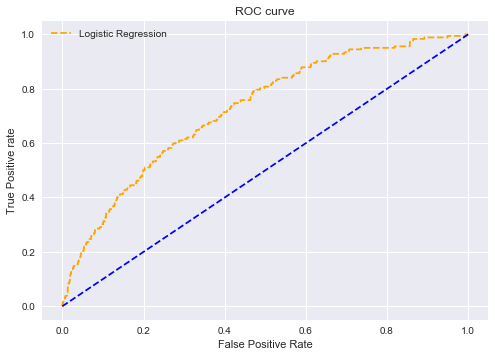



AUC Score is:  0.7240049281640603


In [16]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
print("\n\nAUC Score is: ", auc_score)

# Multi-Class ROC

For multiclass classification problem `OneVSRestClassifier` functionality of `sklearn` is used. The dataset used is of measuremnt of blocks- (height, width etc) with 5 different classes of blocks. 

In [18]:
file_link_multiclass = 'Data_multiclass.csv' # dataset file
dataframe_multiclass = pd.read_csv(file_link_multiclass) # Reading the file
dataframe_multiclass = dataframe_multiclass[~dataframe_multiclass.isin([np.nan, np.inf, -np.inf]).any(1)] # Removing missing values

In [19]:
target_multiclass = dataframe_multiclass.label # Storing the target variable seperately
dataframe_multiclass_2 = dataframe_multiclass.iloc[:,0:len(dataframe_multiclass.columns)-1] # Dataframe without target variable

In [20]:
dataframe_multiclass_2 

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4
5,5,8,40,1.600,0.550,1.000,2.44,22,40,9
6,6,4,24,0.667,0.417,0.708,2.50,10,17,4
7,5,6,30,1.200,0.333,0.333,10.00,10,10,1
8,5,5,25,1.000,0.400,0.520,10.00,10,13,1
9,5,7,35,1.400,0.486,0.914,8.50,17,32,2


In [21]:
X_train, X_test, y_train, y_test = train_test_split(dataframe_multiclass_2, target_multiclass,test_size = 0.3 ,random_state=7) # Test-train split
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=6)) # Making a classifier based on linear support vector

# Made different classifiers based on different classifcation algorithms to test the best one
# You can uncomment the classifier of your choice and test 

#classifier = OneVsRestClassifier(LogisticRegression(max_iter = 100000))
#classifier = OneVsRestClassifier(GaussianProcessClassifier(max_iter_predict = 1000, random_state=0))
#classifier = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0))

# Scaling of training data
scaler = StandardScaler().fit(X_train)

# Scaled Data
X_scaled = scaler.transform(X_train)

# Fitting the classifier
classifier.fit(X_scaled, y_train)

# Getting prob predictions from the model
pred_prob = classifier.predict_proba(X_test)


In [23]:
# Initializing FPR, TPR and threshold dictionaries
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

D:\Anaconda\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)




AUC Score is:  0.603172219945586


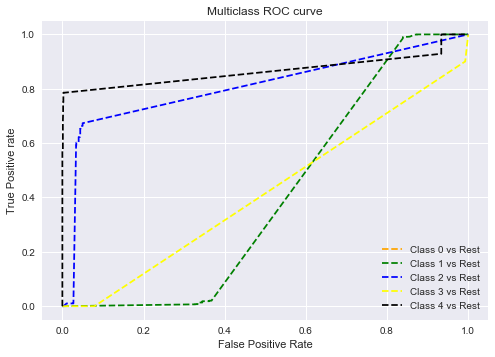

In [24]:
# Plotting

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

print ("\n\nAUC Score is: ", roc_auc_score(y_test, pred_prob, multi_class="ovr", average="macro"))